In [11]:
from data_loader import load_latest_iteration, load_all_files

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import render_particles
import os
%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
from load_combined import load_combined

source_folders = [
    "../data/growth_comparison_variable_dt_1/",
    "../data/growth_comparison_variable_dt_2/",
    # "../data/lambda_scaling1/",
    # "../data/growth_comparison_variable_dt_wrong_stress/",
    # "../data/lambda_scaling1_wrong_stress/",
]

# find recursive subfolders within source_folders
sim_dirs = []
for folder in source_folders:
    for root, dirs, files in os.walk(folder):
        # skip if /data as last part of path
        if "logs" in root or "data" in root.split(os.sep)[-1]:
            continue

        if any(f.endswith(".pvtu") for f in os.listdir(root)):
            sim_dirs.append(os.path.join(root))

particles_dict, sim_dict, params_dict = load_combined(sim_dirs, offset=-0)

loading ../data/growth_comparison_variable_dt_1/vtk_output_soft_1.000000e-02
loading ../data/growth_comparison_variable_dt_1/vtk_output_soft_1.000000e-03
loading ../data/growth_comparison_variable_dt_1/vtk_output_hard_1.000000e-02
loading ../data/growth_comparison_variable_dt_1/vtk_output_soft_1.000000e-04
loading ../data/growth_comparison_variable_dt_1/vtk_output_hard_1.000000e-03
loading ../data/growth_comparison_variable_dt_1/vtk_output_hard_1.000000e-04
loading ../data/growth_comparison_variable_dt_2/vtk_output_soft_1.000000e-02
loading ../data/growth_comparison_variable_dt_2/vtk_output_soft_1.000000e-03
loading ../data/growth_comparison_variable_dt_2/vtk_output_hard_1.000000e-02
loading ../data/growth_comparison_variable_dt_2/vtk_output_soft_1.000000e-04
loading ../data/growth_comparison_variable_dt_2/vtk_output_hard_1.000000e-03
loading ../data/growth_comparison_variable_dt_2/vtk_output_hard_1.000000e-04


In [13]:
particles_dict

,gid,quaternion_x,quaternion_y,quaternion_z,quaternion_w,orientation_x,orientation_y,orientation_z,orientation_angle,length,...,velocity_angular_y,velocity_angular_z,rank,x,y,z,Mode,Sensitivity,sim_dir,offset
0,37024.0,-0.463945,0.0,0.0,-0.885864,-0.569510,0.821984,0.0,2.176710,1.93416,...,0.0,1473.070000,61,10.1053,61.11740,0.0,soft,$\lambda = 10^{-2}$,growth_comparison_variable_dt_1,0
1,37025.0,0.793636,0.0,0.0,-0.608393,0.259716,-0.965685,-0.0,1.833520,1.36132,...,0.0,-2030.190000,61,10.1073,-56.82650,0.0,soft,$\lambda = 10^{-2}$,growth_comparison_variable_dt_1,0
2,37026.0,-0.744479,0.0,0.0,-0.667646,0.108497,0.994097,0.0,1.462090,1.12849,...,0.0,-3415.760000,61,10.1066,10.24050,0.0,soft,$\lambda = 10^{-2}$,growth_comparison_variable_dt_1,0
3,37027.0,0.930515,0.0,0.0,-0.366253,0.731718,-0.681608,-0.0,2.391640,1.36375,...,0.0,538.145000,61,10.1132,73.55990,0.0,soft,$\lambda = 10^{-2}$,growth_comparison_variable_dt_1,0
4,37028.0,-0.749937,0.0,0.0,-0.661510,0.124810,0.992181,0.0,1.445660,1.40007,...,0.0,-95.669100,61,10.1156,-95.35280,0.0,soft,$\lambda = 10^{-2}$,growth_comparison_variable_dt_1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
872761,33625.0,0.628237,0.0,0.0,-0.778022,-0.210636,-0.977565,-0.0,1.358570,1.73377,...,0.0,-0.036644,93,77.2308,-11.10270,0.0,hard,$\lambda = 10^{-4}$,growth_comparison_variable_dt_2,0
872762,33626.0,0.782683,0.0,0.0,-0.622421,0.225185,-0.974316,-0.0,1.797930,1.86775,...,0.0,-0.144474,93,77.2333,6.70648,0.0,hard,$\lambda = 10^{-4}$,growth_comparison_variable_dt_2,0
872763,33627.0,0.990670,0.0,0.0,0.136284,0.962853,0.270025,0.0,0.273419,1.82931,...,0.0,0.243373,93,77.2351,-49.03480,0.0,hard,$\lambda = 10^{-4}$,growth_comparison_variable_dt_2,0
872764,33628.0,0.351380,0.0,0.0,-0.936233,-0.753064,-0.657947,-0.0,0.718089,1.84165,...,0.0,0.059024,93,77.2711,-23.13760,0.0,hard,$\lambda = 10^{-4}$,growth_comparison_variable_dt_2,0


In [14]:
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import networkx as nx
from scipy.spatial import cKDTree
import numpy as np


def build_cell_graph(cells, distance_threshold=1.0, orientation_threshold=0.03):
    """
    Build a graph of cells where edges represent contact + orientation similarity.

    Parameters
    ----------
    cells : pd.DataFrame
        Columns: ['x', 'y', 'orientation_angle'] (0..pi)
    distance_threshold : float
        Max distance for edge
    orientation_threshold : float
        Max relative orientation difference (fraction of pi)

    Returns
    -------
    G : networkx.Graph
        Graph with nodes as cells and edges as contacts
    """
    positions = cells[['x', 'y']].values
    angles = cells['orientation_angle'].values

    tree = cKDTree(positions)
    neighbors = tree.query_pairs(r=distance_threshold)

    G = nx.Graph()
    G.add_nodes_from(range(len(cells)))

    for i, j in neighbors:
        angle_diff = abs(angles[i] - angles[j])
        angle_diff = min(angle_diff, np.pi - angle_diff)
        if angle_diff < orientation_threshold * np.pi:
            G.add_edge(i, j)

    return G, positions


def render_graph_hsv(G, positions, data, filename, clusters=None):
    pos_dict = {i: (x, y) for i, (x, y) in enumerate(positions)}
    plt.figure(figsize=(10, 10))

    if clusters is None:
        nx.draw(G, pos=pos_dict, node_size=10, node_color='skyblue',
                edge_color='gray', with_labels=False)
    else:
        # Compute average angle for each cluster
        cluster_angles = []
        cluster_color_dict = {}
        for cluster in clusters:
            angles = data.iloc[list(cluster)]['orientation_angle'].values
            mean_angle = np.mean(angles)
            cluster_angles.append(mean_angle)

        # Map mean angles to HSV hue (0..1)
        cluster_hues = np.array(cluster_angles) / np.pi  # 0..1 range

        # Assign color per node based on cluster hue
        node_colors = np.zeros((len(data), 3))
        for idx, cluster in enumerate(clusters):
            hue = cluster_hues[idx]

            rgb = mcolors.hsv_to_rgb([hue, 1.0, 1.0])  # Full saturation, value
            for node in cluster:
                cluster_color_dict[node] = rgb
                node_colors[node] = rgb

        nx.draw(G, pos=pos_dict, node_size=10, node_color=node_colors,
                edge_color='gray', with_labels=False)

        #  create new dictionary with cluster colors

    plt.gca().set_aspect('equal')
    plt.savefig(filename, dpi=300)

    if clusters is not None:
        return cluster_color_dict

In [15]:
from scipy.ndimage import gaussian_filter1d
import pandas as pd
import seaborn as sns

MODE_COLORS = {"hard": "blue", "soft": "orange", "Weady et al.": "black"}
LINE_STYLES = {"$\\lambda = 10^{-2}$": "solid",
               "$\\lambda = 10^{-3}$": "dashed", "$\\lambda = 10^{-4}$": "dotted"}


In [16]:
def makeplot(data, x, y, xlabel=None, ylabel=None, outname=None, variable="density",
             xscale=None, yscale=None,
             **kwargs):

    fig, ax = plt.subplots(figsize=(10, 6))
    outname = outname or f"{y}_vs_{x}.png"

    sns.lineplot(data, x=x,                 y=y,
                 hue="Mode", marker="o", ax=ax, **kwargs, lw=2, ms=10)

    if xscale:
        ax.set_xscale(xscale, base=2)
    if yscale:
        ax.set_yscale(yscale, base=2)

    ax.set_xlabel(xlabel or x, fontsize=20)
    ax.set_ylabel(ylabel or y, fontsize=20)
    ax.tick_params(axis='x', labelsize=16)
    ax.tick_params(axis='y', labelsize=16)
    ax.grid(True)
    ax.legend(fontsize=22)

    if outname:
        fig.savefig(outname, dpi=300, bbox_inches="tight")

In [17]:
from render_particles import draw_particles_cluster


def plot_orientation_distribution(particles, filename):

    fig, ax = plt.subplots(figsize=(10, 6))
    particles["orientation_angle"].plot.hist(bins=25,
                                             color='gray', edgecolor='black', density=True)

    # put 0 pi/2 and pi as x axis ticks
    ax.set_xticks([0, np.pi/2, np.pi], ['0', 'π/2', 'π'])

    ax.set_xlabel("Orientation Angle (radians)", fontsize=20)
    ax.set_ylabel("Frequency", fontsize=20)

    ax.tick_params(axis='x', labelsize=16)
    ax.tick_params(axis='y', labelsize=16)

    ax.legend(fontsize=16)

    fig.savefig(filename, dpi=300)


def spherocylinder_area(length,  radius=0.25):
    """
    Calculate projected area of a spherocylinder
    Area = rectangle + 2 semicircles = 2*r*L + π*r²
    """
    return 2 * radius * (length-2*radius) + np.pi * radius**2


def Pa(A, A_star):
    return 0.1*np.exp(-A / A_star)


def plot_cluster_area_kde(particles, clusters, filename):
    fig, ax = plt.subplots(figsize=(10, 6))

    cluster_areas = []
    for cluster in clusters:
        cluster_lengths = particles.iloc[cluster]['length']
        cluster_areas.append(sum(spherocylinder_area(l)
                             for l in cluster_lengths))

    cluster_series = pd.Series(cluster_areas)

    x = np.linspace(cluster_series.min(), cluster_series.max(), 100)

    cluster_series.plot.kde()
    plt.plot(x, Pa(x, 20.0), label='A* = 20.0', color='red', linewidth=2)

    ax.set_xlim(cluster_series.min(), cluster_series.max())
    ax.set_ylim(1e-6, None)

    # log scale x axis
    ax.set_yscale('log')

    ax.set_xlabel("Cluster Area", fontsize=20)
    ax.set_ylabel("Probability Density", fontsize=20)

    ax.tick_params(axis='x', labelsize=16)
    ax.tick_params(axis='y', labelsize=16)

    ax.grid(True)
    ax.legend(fontsize=16)

    fig.savefig(filename, dpi=300)


def plot_cluster_area_distribution(particles, clusters, filename):
    fig, ax = plt.subplots(figsize=(10, 6))

    # determine average length per cluster
    cluster_areas = []
    for cluster in clusters:
        cluster_lengths = particles.iloc[cluster]['length']
        cluster_areas.append(sum(spherocylinder_area(l)
                             for l in cluster_lengths))

    # plot probability distribution of cluster areas
    ax.hist(cluster_areas, bins=30, color='gray',
            edgecolor='black', density=True)

    ax.set_yscale('log')

    ax.set_xlabel("Cluster Area", fontsize=20)
    ax.set_ylabel("Probability Density", fontsize=20)

    ax.tick_params(axis='x', labelsize=16)
    ax.tick_params(axis='y', labelsize=16)

    ax.legend(fontsize=16)

    fig.savefig(filename, dpi=300)

In [18]:
particles_dict['area'] = particles_dict['length'].apply(spherocylinder_area)

In [19]:
updated_particles_dict = []

for key, particles in particles_dict.groupby(["Mode", "Sensitivity", "sim_dir", "offset"]):
    print(f"Processing {key}")

    G, positions = build_cell_graph(
        particles, distance_threshold=2.2, orientation_threshold=0.03)

    clusters = [list(c) for c in nx.connected_components(G)]
    # add cluster field to each particle

    for cluster_id, cluster in enumerate(clusters):
        particles.loc[particles.index[cluster], 'cluster'] = cluster_id

    updated_particles_dict.append(particles)

particles_dict = pd.concat(updated_particles_dict, ignore_index=True)

Processing ('hard', '$\\lambda = 10^{-2}$', 'growth_comparison_variable_dt_1', np.int64(0))
Processing ('hard', '$\\lambda = 10^{-2}$', 'growth_comparison_variable_dt_2', np.int64(0))
Processing ('hard', '$\\lambda = 10^{-3}$', 'growth_comparison_variable_dt_1', np.int64(0))
Processing ('hard', '$\\lambda = 10^{-3}$', 'growth_comparison_variable_dt_2', np.int64(0))
Processing ('hard', '$\\lambda = 10^{-4}$', 'growth_comparison_variable_dt_1', np.int64(0))
Processing ('hard', '$\\lambda = 10^{-4}$', 'growth_comparison_variable_dt_2', np.int64(0))
Processing ('soft', '$\\lambda = 10^{-2}$', 'growth_comparison_variable_dt_1', np.int64(0))
Processing ('soft', '$\\lambda = 10^{-2}$', 'growth_comparison_variable_dt_2', np.int64(0))
Processing ('soft', '$\\lambda = 10^{-3}$', 'growth_comparison_variable_dt_1', np.int64(0))
Processing ('soft', '$\\lambda = 10^{-3}$', 'growth_comparison_variable_dt_2', np.int64(0))
Processing ('soft', '$\\lambda = 10^{-4}$', 'growth_comparison_variable_dt_1', n

('hard', 'growth_comparison_variable_dt_1', np.int64(0))


ValueError: Could not interpret value `Mode` for `hue`. An entry with this name does not appear in `data`.

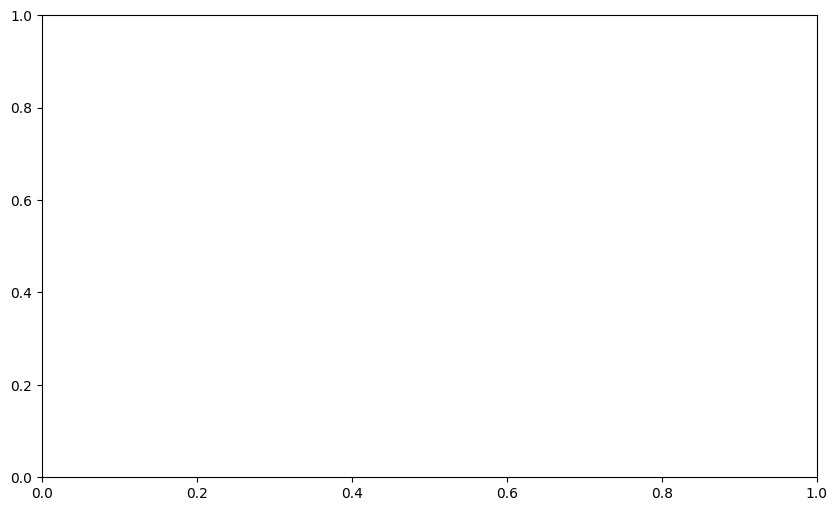

In [20]:

fig, ax = plt.subplots(figsize=(10, 6))

for key, particles in particles_dict.groupby(["Mode",  "sim_dir", "offset"]):
    print(key)

    # calculate total cluster area per cluster
    cluster_summary = (
        particles.groupby('cluster')
        .agg(
            total_area=('area', 'sum'),
            center_x=('x', 'mean'),
            center_y=('y', 'mean'),
            center_z=('z', 'mean'),
            count=('gid', 'count'),
            mode=('Mode', 'first'),
            sensitivity=('Sensitivity', 'first'),
        )
        .reset_index())
    cluster_summary['radius'] = np.sqrt(
        cluster_summary['center_x']**2 + cluster_summary['center_y']**2)

    sns.kdeplot(data=cluster_summary, x='total_area',
                fill=False,   ax=ax, lw=2, bw_adjust=5, hue="Mode",  palette=MODE_COLORS)

# set xllim
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim(1e0, 2300)
ax.set_ylim(1e-6, 1)
ax.set_xlabel("Cluster Area", fontsize=20)
ax.set_ylabel("Probability Density", fontsize=20)

ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.grid(True)
ax.legend(title="Mode, Sensitivity, Sim_dir, Offset",
          fontsize=14, title_fontsize=16)
ax.legend(title="Mode, Sensitivity, Sim_dir, Offset",
          fontsize=14, title_fontsize=16)